In [35]:
import numpy as np
import matplotlib.pyplot as plt
import math

Let's first define our functions, which we'll need below:
1) The underlying PDF function: gaussian with mean=0 and std dev = 1
2) Our proposal function: gaussian with mean given by previous point and std dev =1
3) Acceptance function

In [132]:
# define our underlying PDF to sample
def pdfFunc(xvar):
    mean = 0
    stddev = 5
    retval = 1/np.sqrt(2*math.pi)
    retval *= math.exp(-1*math.pow(xvar-mean,2)/(2*math.pow(stddev,2)))
    print("pdf value: ", retval)
    return retval

# define our proposal function
def propFunc(xvar):
    stddev = 20
    retval = np.random.normal(xvar,stddev)
    print("proposal: ", retval)
    return retval

# define our acceptance function
def acceptPoint(x1, x2, rand):
    threshold = np.minimum(1,pdfFunc(x2)/(pdfFunc(x1)+1e-9))
    print("threshold: ", threshold)
    print("rand: ", rand)
    if rand < threshold:
        return x2
    else:
        return x1

In [180]:
seq1 = []
seq2 = []
seed1 = 80
seed2 = -52

In [181]:
x1 = seed1
seq1.append([0,x1])

x2 = seed2
seq2.append([0,x2])

print("starting our sequence")
print("now")
for i in range(1,10000):    
    x1 = acceptPoint(x1,propFunc(x1),np.random.uniform(0,1))    
    seq1.append([i,x1])

    x2 = acceptPoint(x2,propFunc(x2),np.random.uniform(0,1))
    seq2.append([i,x2])

starting our sequence
now
proposal:  55.146012996949814
pdf value:  1.5360343356883452e-27
pdf value:  1.0261630727919036e-56
threshold:  1.536034335688345e-18
rand:  0.42328790883984446
proposal:  -65.22937584788657
pdf value:  4.401148503877962e-38
pdf value:  1.3009616199239223e-24
threshold:  4.4011485038779565e-29
rand:  0.12315002803082409
proposal:  71.48819608201293
pdf value:  1.626039120721961e-45
pdf value:  1.0261630727919036e-56
threshold:  1.626039120721961e-36
rand:  0.9738169057397718
proposal:  -32.24394651996927
pdf value:  3.71905890250941e-10
pdf value:  1.3009616199239223e-24
threshold:  0.3719058902509405
rand:  0.42353551578600457
proposal:  104.29479587509184
pdf value:  1.321221078796008e-95
pdf value:  1.0261630727919036e-56
threshold:  1.321221078796008e-86
rand:  0.09926106427136738
proposal:  -43.81155895126027
pdf value:  8.48703059488843e-18
pdf value:  1.3009616199239223e-24
threshold:  8.48703059488842e-09
rand:  0.5560237393698102
proposal:  103.202703

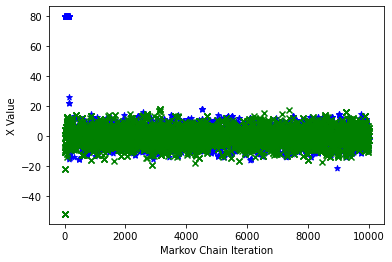

In [182]:
x1, y1 = zip(*seq1)
x2, y2 = zip(*seq2)

plt.scatter(x1,y1,marker="*",color="b")
plt.scatter(x2,y2,marker="x",color="g")
plt.ylabel('X Value')
plt.xlabel('Markov Chain Iteration');
plt.show()

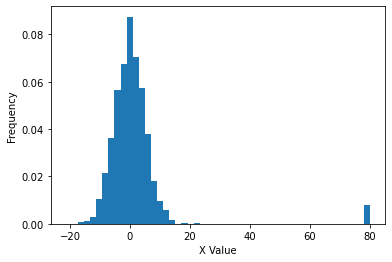

In [184]:
plt.hist(y1,density="true",bins=50)
plt.ylabel('Frequency')
plt.xlabel('X Value');
plt.show()